# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Nada Ayman Bahy Elgamal

ID: 55-24870

Tutorial: 5

---

Name: Mariam Yehia Hassan

ID: 55-4910

Tutorial: 5

---

Name:

ID:

Tutorial:

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn-v0_8")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/main/data/telecom_churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In [ ]:
df.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7022,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),$69.5/m,$2625.25,No
7023,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),$102.95/m,NaN,Yes
7024,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),$78.7/m,$1495.1,No
7025,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,$60.65/m,$743.3,No
7026,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),$21.15/m,NaN,No
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,$84.8/m,$1990.5,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),$103.2/m,$7362.9,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.6/m,$346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,$74.4/m,$306.6,Yes
7031,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),$105.65/m,$6844.5,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

In [ ]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,6976,7032,7032.000000,7032,7032,7032.000000,7032,7032,7032,7032,...,7032,7032,7032,7032,7032,7032,7032,7032,6180,7032
unique,6976,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,1584,5783,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$20.05/m,$20.2,No
freq,1,3549,NaN,3639,4933,NaN,6352,3385,3096,3497,...,3094,3472,2809,2781,3875,4168,2365,61,8,5163
mean,NaN,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
customerID,56
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transf

In [ ]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

customerID: Number of unique values 6976
gender: Number of unique values 2
SeniorCitizen: Number of unique values 2
Partner: Number of unique values 2
Dependents: Number of unique values 2
tenure: Number of unique values 72
PhoneService: Number of unique values 2
MultipleLines: Number of unique values 3
InternetService: Number of unique values 3
OnlineSecurity: Number of unique values 3
OnlineBackup: Number of unique values 3
DeviceProtection: Number of unique values 3
TechSupport: Number of unique values 3
StreamingTV: Number of unique values 3
StreamingMovies: Number of unique values 3
Contract: Number of unique values 3
PaperlessBilling: Number of unique values 2
PaymentMethod: Number of unique values 4
MonthlyCharges: Number of unique values 1584
TotalCharges: Number of unique values 5783
Churn: Number of unique values 2


In [ ]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : ['$29.85/m' '$56.95/m' '$53.85/m' ... '$63.1/m' '$44.2/m' '$78.7/m']
TotalCharges : ['$29.85' '$1889.5' '$108.15' ... '$346.45' '$306.6' '$6844.5']
Churn : ['No' 'Yes']


## Data Cleaning

In [ ]:
# Rename columns to add spaces between words
df.columns = df.columns.str.replace(r'(?<!^)(?=[A-Z])', ' ', regex=True)

# Check the new column names
print(df.columns)


Index(['customer I D', 'gender', 'Senior Citizen', 'Partner', 'Dependents',
       'tenure', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming T V', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object')


In [ ]:
df = df.rename(columns={'customer I D':'Customer ID','gender':'Gender','tenure':'Tenure','Streaming T V':'Streaming TV'})


In [ ]:
# Check the new column names
print(df.columns)

Index(['Customer ID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object')


In [ ]:



# Removing dollar sign and /m from Monthly Charges
df['Monthly Charges'] = df['Monthly Charges'].str.replace(r'[\$/m]', '', regex=True).astype(float)

# Removing dollar sign from Total Charges
df['Total Charges'] = df['Total Charges'].str.replace(r'[$]', '', regex=True).astype(float)

# Displaying the result
df

,Customer ID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
df = df.rename(columns={'Monthly Charges':'Monthly Charges$/m','Total Charges':'Total Charges$'})

In [ ]:
df.head()

,Customer ID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges$/m,Total Charges$,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Converting 'Total Charges' column to numeric
df['Total Charges$'] = pd.to_numeric(df['Total Charges$'], errors='coerce')  # Converts non-numeric values to NaN if any

# Display the DataFrame to check the result
df

,Customer ID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges$/m,Total Charges$,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:


# Calculate the mean of the TotalCharges column, ignoring null values
mean_total_charges = df['Total Charges$'].mean()

# Replace null values with the calculated mean
df['Total Charges$'].fillna(mean_total_charges, inplace=True)

# Verify if null values are replaced
print(df['Total Charges$'].isnull().sum())


0


<ipython-input-87-c4210408eb89>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Charges$'].fillna(mean_total_charges, inplace=True)


In [ ]:
# Converting 'Total Charges' column to numeric
df['Monthly Charges$/m'] = pd.to_numeric(df['Monthly Charges$/m'], errors='coerce')  # Converts non-numeric values to NaN if any

# Display the DataFrame to check the result
df

,Customer ID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges$/m,Total Charges$,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
df.drop(['Customer ID'], axis="columns", inplace=True)

In [ ]:
df['Churn'] = df['Churn'].astype('category').cat.codes
df['Churn']

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7027,0
7028,0
7029,0
7030,1


## Exploratory Data Analysis

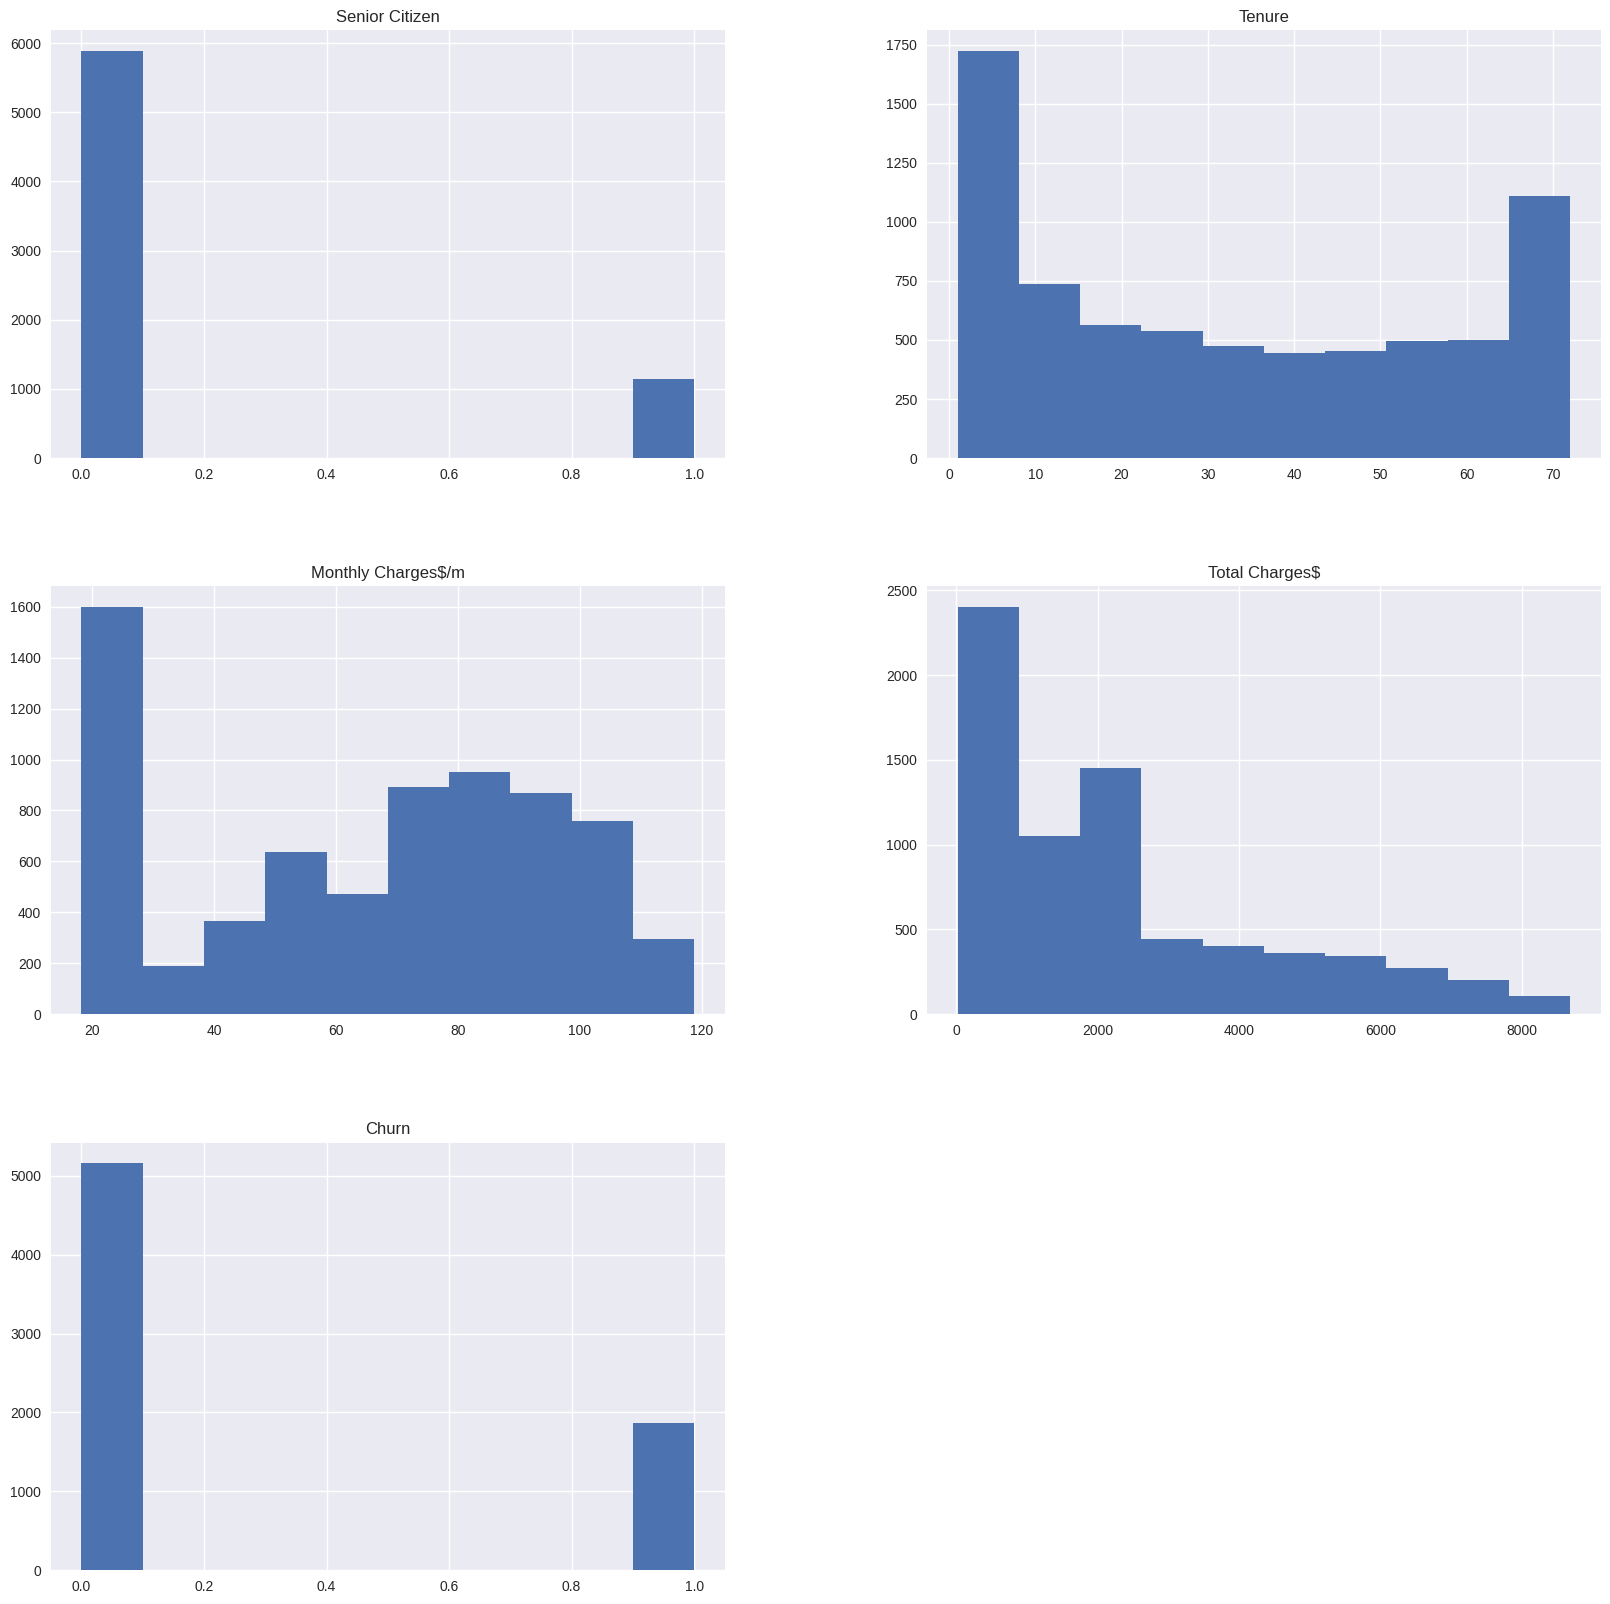

In [ ]:
# Visulazing the distibution of the data for every feature
df.hist(figsize=(20, 20));

**Commenting on the histogram**
Senior citizenship:The histogram shows a significant class imbalance which is a problem generally occuring in binary classifications,the majority of customers are not senior citizens. as the number of non senior citizens is 5890 which is 5 times the number of senior citizens which is 1142

Churn:The histogram of churn also represent class imbalance which is a huge challenge making dataset skewed leaning more towards predicting No churn due to large representation of non-churned customers in comparison to churned ones where non churned customers represent 5163 customer which is approximately 3 times more than the number of churned customers represent only 1869 customer.

Tenure:From the histogram shown,It is obvious that the graph is right skewed, and most of the customers stayed the least number of months in the company,as shown in the graph, the highest number of customers which is approximately 1750 stayed in the company from 1 to approximately 8 months.

Monthly charges:The histogram is also skewed,where most of the customers are paying lower monthly fees,and only few customers are paying high amounts.Which means that most of the customer opted for basic services  with low monthly charges,while a smaller segment of customers pay for high quality services.

Total Charges:In total charges histogram,it is obvious that the graph is right skewed, the most values are concentrated at lower levels but some values towards higher total amounts.where most of the values are payed by low number of customers,while only certain values are paid by high number of customers for example 0 to approximate 1000 is paid by the highest number of customers which is approximately 2300, and 1800 to approximately 2300 is paid by the second highest number of customers which is approximately 1400, the rest of the values are paid by low number of customers

In [ ]:
df['Churn'].value_counts()

,count
Churn,
0,5163
1,1869


In [ ]:
df['Senior Citizen'].value_counts()

,count
Senior Citizen,
0,5890
1,1142


In [ ]:
df['Churn'].value_counts() / df['Churn'].count()

,count
Churn,
0,0.734215
1,0.265785


In [ ]:
df.head(15)

,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges$/m,Total Charges$,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


In [ ]:
categorical_features = categorical_col.copy()
categorical_features.remove('Churn')

In [ ]:
# Redefine categorical_features based on the cleaned df
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Remove the target column if it's included
if 'Churn' in categorical_features:
    categorical_features.remove('Churn')

# Now categorical_features should match your cleaned df
print("Updated categorical features:", categorical_features)


Updated categorical features: ['Gender', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']


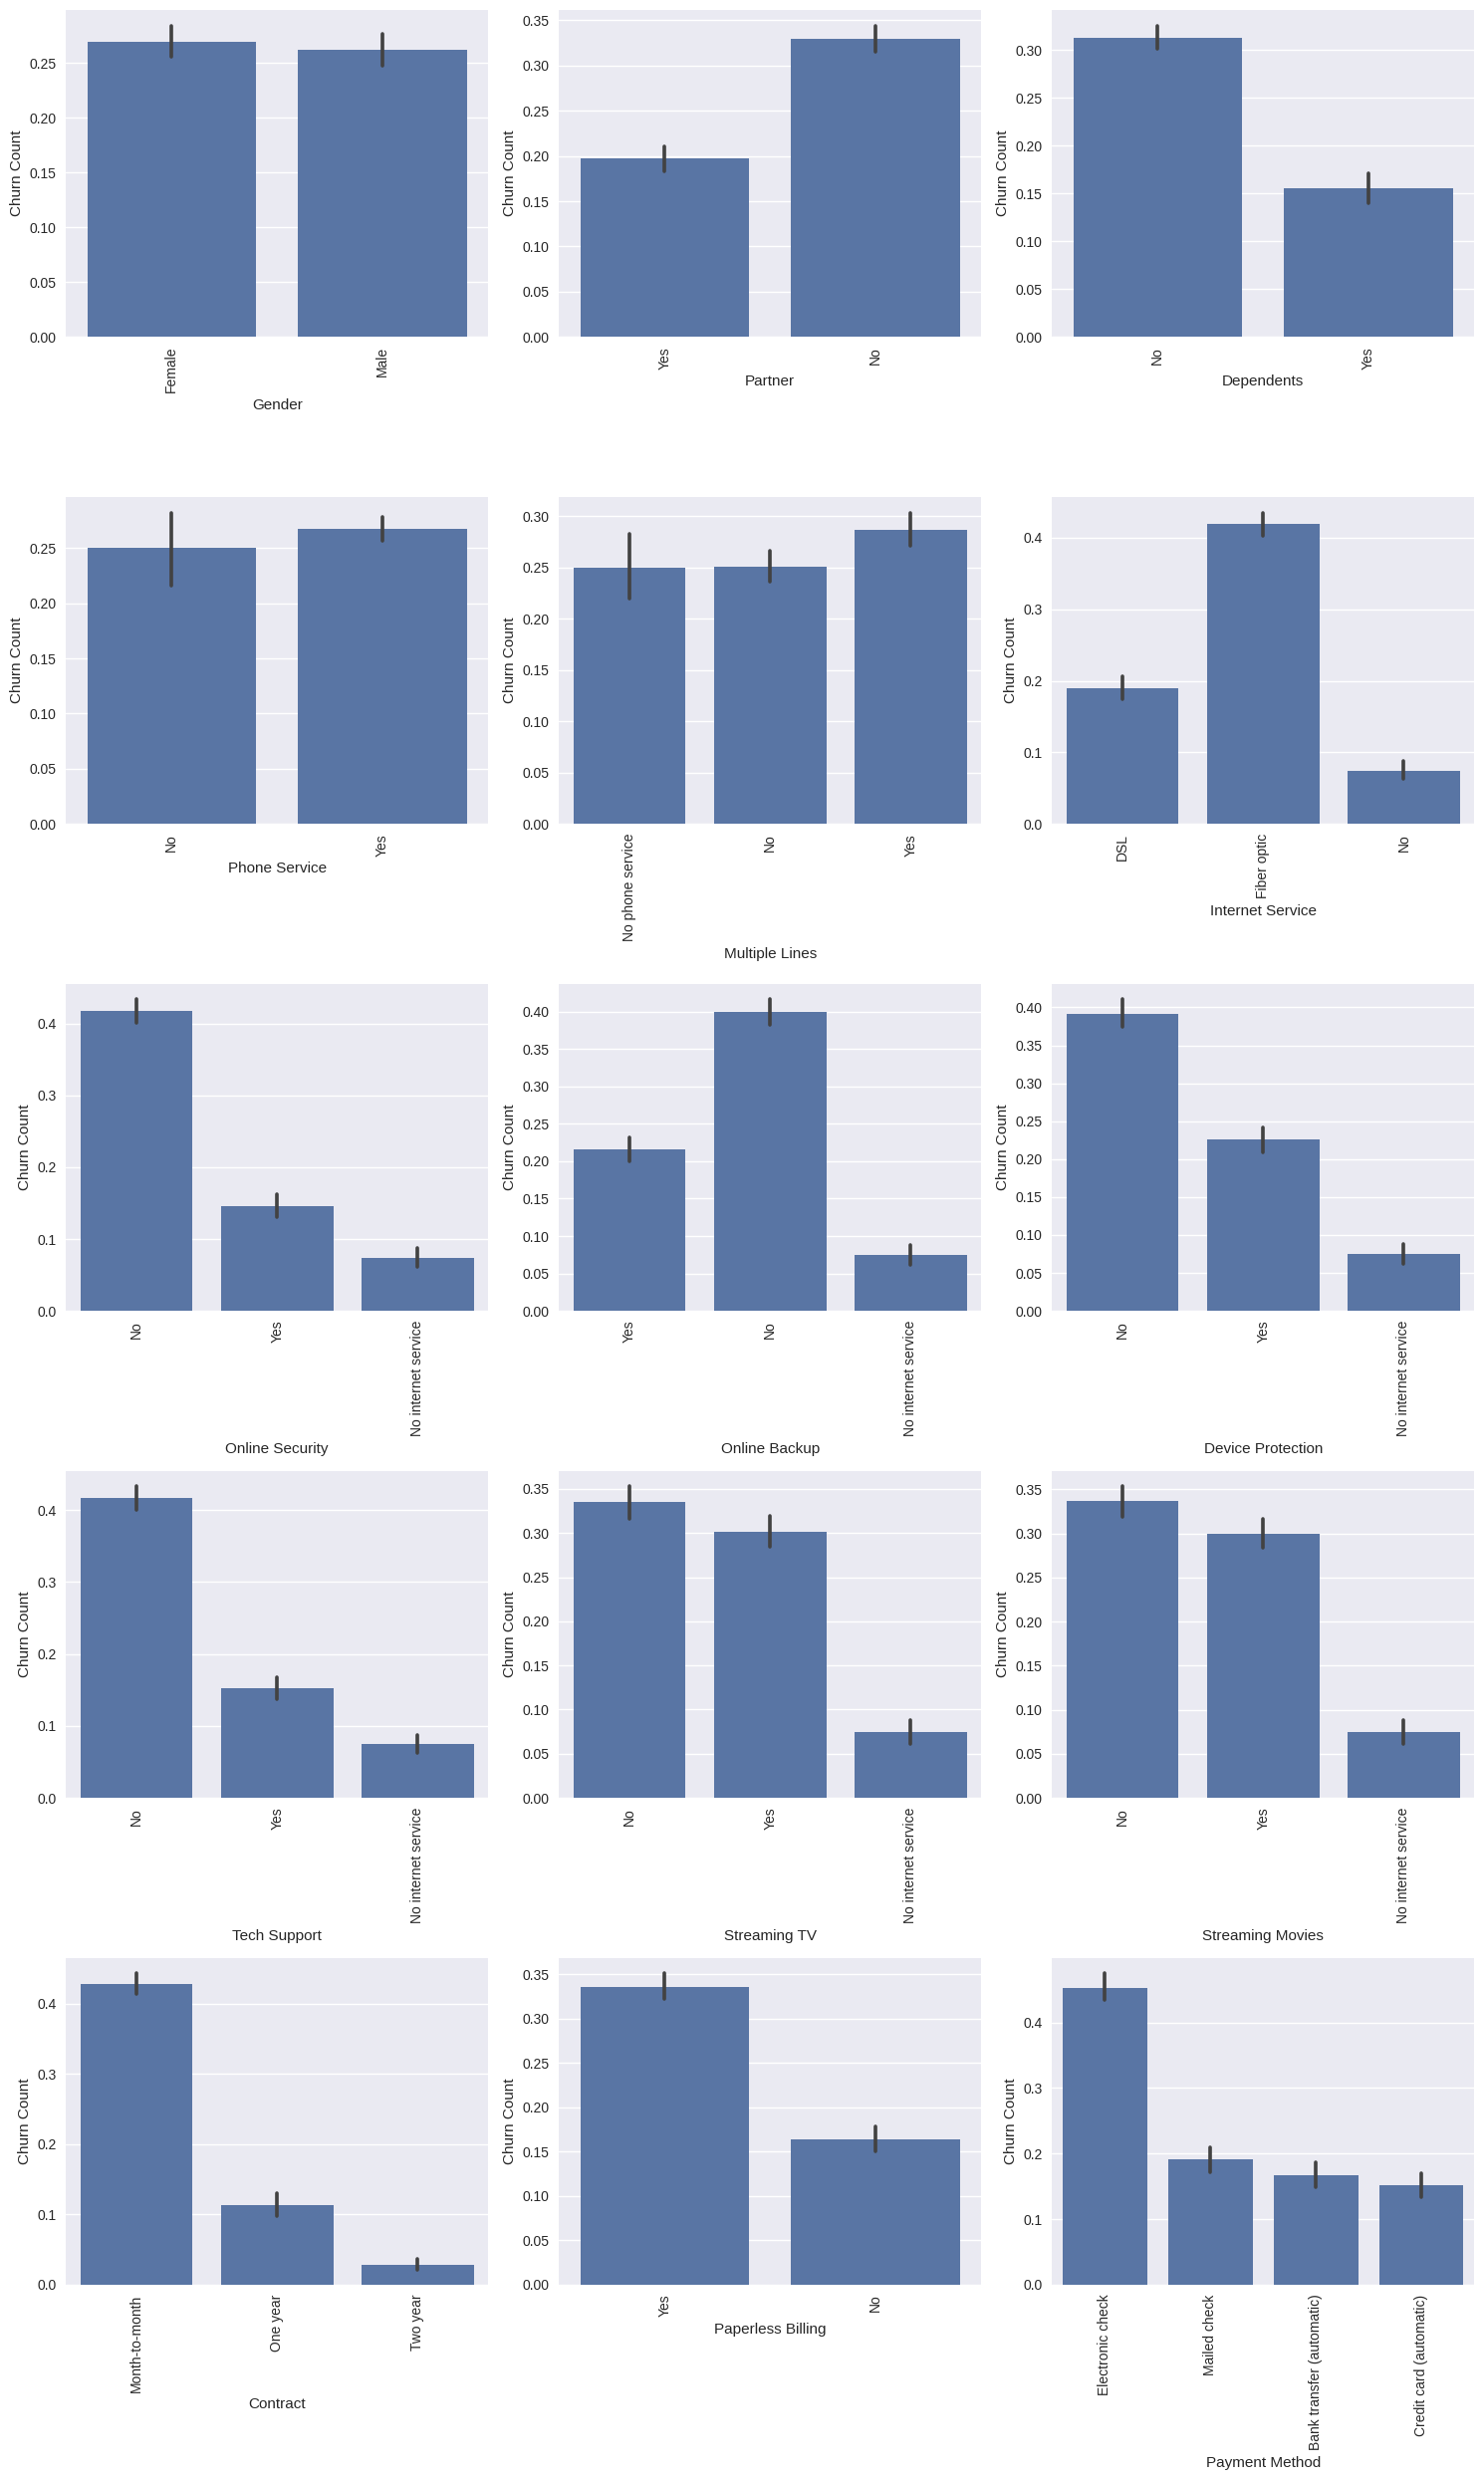

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming categorical_features is your list of categorical columns
num_columns = len(categorical_features)

# Determine the number of rows and columns for the subplot grid
n_cols = 3  # You can adjust this to change the number of columns in the grid
n_rows = math.ceil(num_columns / n_cols)  # Number of rows is the ceiling of total columns / columns per row

# Create the figure with adjusted size
plt.figure(figsize=(n_cols * 5, n_rows * 5))

# Plotting each feature against 'Churn'
for i, column in enumerate(categorical_features, 1):
    plt.subplot(n_rows, n_cols, i)  # Create subplot for each feature
    g = sns.barplot(x=column, y='Churn', data=df)
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability
    plt.ylabel('Churn Count')  # y-axis label
    plt.xlabel(f'{column}')  # x-axis label (feature name)

# Show the plot
plt.tight_layout()  # Adjust the layout for better spacing
plt.show()


**Bar plot interpretation**
- The gender of the customer has a very little effect on customer churn (doesn't matter), females are more likely with a very small difference to churn than males
- Customers who don't have partners are more likely to churn
- Customers who don't have dependents are more likely to churn
- Customers who have or not have phone service, it doesn't matter too much. The graph shows that Customers who have phone service are more likely to churn than those who have not but it is a very little difference
- Customers who have multiple lines are more likely to churn
- Customers using Fiber optics Internet service are more likely to churn than other Internet services types
- Customers who don't have online security are more likely to churn
- Customers who don't have online backup are more likely to churn
- Customers who don't have online device protection are more likely to churn
- Customers who don't have online Tech support are more likely to churn
- Customers who don't have streaming TV are more likely to churn than those who have
- Customers who don't have online streaming movies are more likely to churn than those who have
- Customers with month-to-month contract term are more likely to churn than other contract terms
- Customers who have paperless billing are more likely to churn than those who don't
- Customers who pay by Electronic check are more likely to churn than Customers who pay by other types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              7032 non-null   object 
 1   Senior Citizen      7032 non-null   int64  
 2   Partner             7032 non-null   object 
 3   Dependents          7032 non-null   object 
 4   Tenure              7032 non-null   int64  
 5   Phone Service       7032 non-null   object 
 6   Multiple Lines      7032 non-null   object 
 7   Internet Service    7032 non-null   object 
 8   Online Security     7032 non-null   object 
 9   Online Backup       7032 non-null   object 
 10  Device Protection   7032 non-null   object 
 11  Tech Support        7032 non-null   object 
 12  Streaming TV        7032 non-null   object 
 13  Streaming Movies    7032 non-null   object 
 14  Contract            7032 non-null   object 
 15  Paperless Billing   7032 non-null   object 
 16  Paymen

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

In [ ]:
df_encoded = df.copy()

In [ ]:
import pandas as pd

# List of columns to apply one-hot encoding
columns_to_encode = ['Gender', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']



# Apply one-hot encoding without dropping the first category
df_encoded = pd.get_dummies(df_encoded, columns=columns_to_encode, drop_first=False)

# Display the first few rows of the encoded dataframe
print(df_encoded.head())


   Senior Citizen  Tenure    Multiple Lines Internet Service Online Security  \
0               0       1  No phone service              DSL              No   
1               0      34                No              DSL             Yes   
2               0       2                No              DSL             Yes   
3               0      45  No phone service              DSL             Yes   
4               0       2                No      Fiber optic              No   

  Online Backup Device Protection Tech Support Streaming TV Streaming Movies  \
0           Yes                No           No           No               No   
1            No               Yes           No           No               No   
2           Yes                No           No           No               No   
3            No               Yes          Yes           No               No   
4            No                No           No           No               No   

   ... Gender_Female Gender_Male  Part

In [ ]:
df_encoded.head()

,Senior Citizen,Tenure,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,...,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,Phone Service_Yes,Paperless Billing_No,Paperless Billing_Yes
0,0,1,No phone service,DSL,No,Yes,No,No,No,No,...,True,False,False,True,True,False,True,False,False,True
1,0,34,No,DSL,Yes,No,Yes,No,No,No,...,False,True,True,False,True,False,False,True,True,False
2,0,2,No,DSL,Yes,Yes,No,No,No,No,...,False,True,True,False,True,False,False,True,False,True
3,0,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,...,False,True,True,False,True,False,True,False,True,False
4,0,2,No,Fiber optic,No,No,No,No,No,No,...,True,False,True,False,True,False,False,True,False,True


In [ ]:
df_encoded.drop(['Gender_Female', 'Partner_No','Dependents_No','Phone Service_No','Paperless Billing_No'], axis='columns', inplace=True)
df_encoded.columns

Index(['Senior Citizen', 'Tenure', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Payment Method',
       'Monthly Charges$/m', 'Total Charges$', 'Churn', 'Gender_Male',
       'Partner_Yes', 'Dependents_Yes', 'Phone Service_Yes',
       'Paperless Billing_Yes'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of categorical features to label encode
categorical_features = [
    'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
    'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
    'Contract', 'Payment Method'
]

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for feature in categorical_features:
    df_encoded[feature] = label_encoder.fit_transform(df[feature])

# Display the first few rows of the DataFrame to check the encoded values
df_encoded.head()

,Senior Citizen,Tenure,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Payment Method,Monthly Charges$/m,Total Charges$,Churn,Gender_Male,Partner_Yes,Dependents_Yes,Phone Service_Yes,Paperless Billing_Yes
0,0,1,1,0,0,2,0,0,0,0,0,2,29.85,29.85,0,False,True,False,False,True
1,0,34,0,0,2,0,2,0,0,0,1,3,56.95,1889.50,0,True,False,False,True,False
2,0,2,0,0,2,2,0,0,0,0,0,3,53.85,108.15,1,True,False,False,True,True
3,0,45,1,0,2,0,2,2,0,0,1,0,42.30,1840.75,0,True,False,False,False,False
4,0,2,0,1,0,0,0,0,0,0,0,2,70.70,151.65,1,False,False,False,True,True


<ipython-input-105-ff3b6ce80ad1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_with_churn.index, y=correlations_with_churn.values, palette='coolwarm')


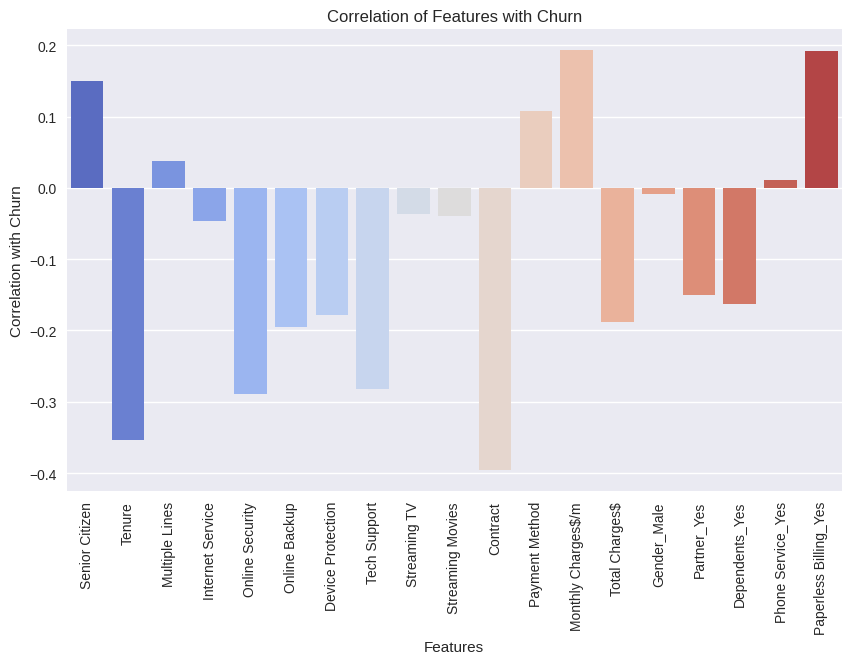

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: assuming 'df' is your DataFrame and 'Churn' is the target variable
# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Extract correlation values of the features with 'Churn' (target variable)
correlations_with_churn = correlation_matrix['Churn'].drop('Churn')

# Create a bar plot to visualize correlations with 'Churn'
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations_with_churn.index, y=correlations_with_churn.values, palette='coolwarm')
plt.xlabel('Features')
plt.ylabel('Correlation with Churn')
plt.title('Correlation of Features with Churn')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()


In [ ]:
# Assuming 'df_encoded' is your DataFrame
# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Extract correlation values of the features with 'Churn' (target variable)
correlations_with_churn = correlation_matrix['Churn'].drop('Churn')

# Print the exact correlation values for each feature
print("Correlation of each feature with Churn:")
print(correlations_with_churn)


Correlation of each feature with Churn:
Senior Citizen           0.150541
Tenure                  -0.354049
Multiple Lines           0.038043
Internet Service        -0.047097
Online Security         -0.289050
Online Backup           -0.195290
Device Protection       -0.177883
Tech Support            -0.282232
Streaming TV            -0.036303
Streaming Movies        -0.038802
Contract                -0.396150
Payment Method           0.107852
Monthly Charges$/m       0.192858
Total Charges$          -0.188053
Gender_Male             -0.008545
Partner_Yes             -0.149982
Dependents_Yes          -0.163128
Phone Service_Yes        0.011691
Paperless Billing_Yes    0.191454
Name: Churn, dtype: float64


**Answer for Q1**: The most correlated attributes are: the Contract which is highly negatively correlated with -0.396150, followed by Tenure which is also highly negatively correlated with -0.354049, followed by Online security which is also highly negatively correlated with -0.289050.



**Q2: Which payment method has the highest churn rate?**

**Visualization**

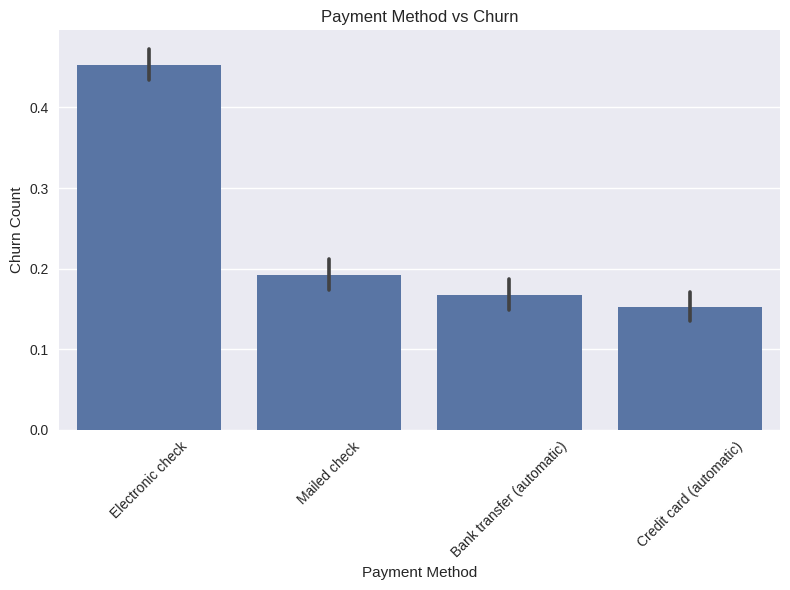

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot for 'Payment Method' against 'Churn'
plt.figure(figsize=(8, 6))  # Adjust the size of the plot as needed
sns.barplot(x='Payment Method', y='Churn', data=df)

# Customize the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Payment Method')  # x-axis label
plt.ylabel('Churn Count')  # y-axis label
plt.title('Payment Method vs Churn')  # Optional title

# Show the plot
plt.tight_layout()  # Adjust the layout for better spacing
plt.show()


In [ ]:
# Group by 'Payment Method' and 'Churn', then count occurrences
payment_churn_counts = df.groupby(['Payment Method', 'Churn']).size().unstack()

# Display the churn counts for each payment method
print("Churn Counts by Payment Method:")
print(payment_churn_counts)


Churn Counts by Payment Method:
Churn                         0     1
Payment Method                       
Bank transfer (automatic)  1284   258
Credit card (automatic)    1289   232
Electronic check           1294  1071
Mailed check               1296   308


**Answer for Q2**: Electronic check has the highest churn rate with 1071 customers using it are likely to churn.

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

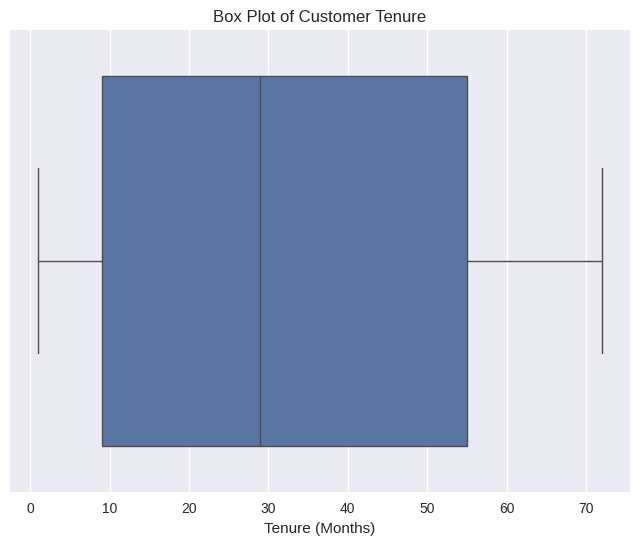

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the box plot for the 'Tenure' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Tenure'])

# Set labels and title
plt.xlabel('Tenure (Months)')
plt.title('Box Plot of Customer Tenure')

# Show the plot
plt.show()


**Answer for Q3**: Based on the box plot for customer tenure, we can interpret the distribution of customer tenure at the 25%, 50%, and 75% percentiles:

25th Percentile (Q1): Approximately at 10 months. This means that 25% of the customers have a tenure of up to 10 months, suggesting that a significant portion of churn may occur early, as some customers leave the service within the first 10 months.

50th Percentile (Median): Approximately at 30 months. This indicates that half of the customers have a tenure of up to 30 months. This median tenure suggests that while some customers leave early, a large portion stays for over two years.

75th Percentile (Q3): Approximately at 60 months. At this point, 75% of the customers have a tenure of up to 60 months, meaning that only the top 25% of customers have stayed longer than 60 months. This suggests that long-term loyalty is limited to a minority of the customer base. This implies that only a small portion of the customer base remains loyal over the long term.

Interpretation:
Customers commonly churn at various points, but a significant portion leaves by around 10 months (25th percentile) and 30 months (median). The spread also suggests that after the two-year mark, the rate of churn decreases, as the top 25% of customers have a tenure extending to 60 months or more. This pattern implies a higher churn risk in the early stages of the customer lifecycle, particularly within the first two years.

## Data Preparation for Modelling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              7032 non-null   object 
 1   Senior Citizen      7032 non-null   int64  
 2   Partner             7032 non-null   object 
 3   Dependents          7032 non-null   object 
 4   Tenure              7032 non-null   int64  
 5   Phone Service       7032 non-null   object 
 6   Multiple Lines      7032 non-null   object 
 7   Internet Service    7032 non-null   object 
 8   Online Security     7032 non-null   object 
 9   Online Backup       7032 non-null   object 
 10  Device Protection   7032 non-null   object 
 11  Tech Support        7032 non-null   object 
 12  Streaming TV        7032 non-null   object 
 13  Streaming Movies    7032 non-null   object 
 14  Contract            7032 non-null   object 
 15  Paperless Billing   7032 non-null   object 
 16  Paymen

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modelling

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
%timeit tree_clf.fit(X_train, y_train)

32.4 ms ± 442 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Tree Visualization

In [ ]:
#This code works on google colab
# First, install the graphviz package
!pip install graphviz

import graphviz
from sklearn.tree import export_graphviz


dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the dot data
graph = graphviz.Source(dot_data)

# Display the graph(uncomment the below line)
#graph

# Alternatively, to export the graph to a file, uncomment the line below:
graph.render('Churn')


'Churn.pdf'

In [ ]:
!apt-get install -y graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)

# Create the graph object
graph = graphviz.Source(dot_data)

# Display the graph directly
graph


**Question 4 one of the rules of customer churn in the tree**
We traced the tree from the root to the left most leaf node where the contract <=0.5, Monthly Charges$/m <=68.6, Tenure<=3.5, Online security <=0.5, Payment method <=2.5, Monthly Charges$/m<=49.6, Monthly Charges$/m<=45.05, Streaming movies<=1, Total Charges$<=81.7, Total Charges$<=53.025, Total Charges$<=44.475, Partner_yes<=0.5, PaperlessBilling_yes<=0.5, Online Backup<=1.0, Monthly Charges$/m<=24.925. This gave us gini=0.0, samples=1, value[0,1] and class= YES.

In [ ]:
# Render and save the graph to a file
graph.render('Churn')


'Churn.pdf'

In [ ]:
import shutil

# Move the file to the content directory if it's not there
shutil.move('Churn.pdf', '/content/Churn.pdf')


'/content/Churn.pdf'

In [ ]:
from google.colab import files

# Download the Churn.pdf file
files.download('/content/Churn.pdf')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.86%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.998342     0.999233  0.998578     0.998787      0.998579
recall        0.999723     0.995413  0.998578     0.997568      0.998578
f1-score      0.999032     0.997319  0.998578     0.998176      0.998577
support    3614.000000  1308.000000  0.998578  4922.000000   4922.000000
_______________________________________________
Confusion Matrix: 
 [[3613    1]
 [   6 1302]]

Test Result:
Accuracy Score: 71.18%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.806915    0.459272  0.711848     0.633093      0.714484
recall        0.798580    0.472371  0.711848     0.635475      0.711848
f1-score      0.802726    0.465729  0.711848     0.634227      0.713126
support    1549.000000  561.000000  

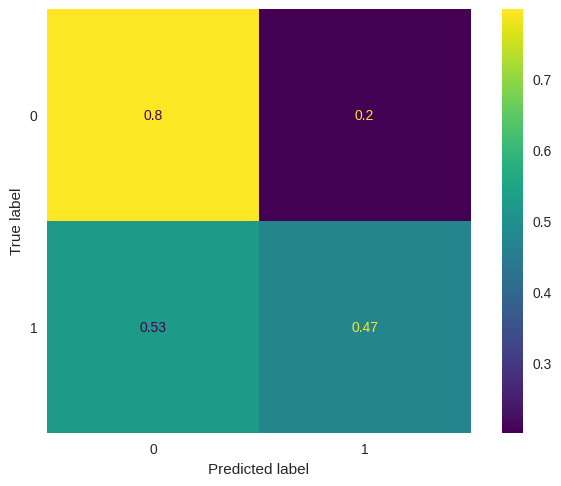

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, tree_clf.predict(X_test), labels=tree_clf.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_)
disp.plot()
plt.grid(False)

**Confusion Matrix interpretation**
This image is a confusion matrix for a binary classification model, likely used for predicting a binary outcome like customer churn. Here's an interpretation of each cell in the matrix and overall model performance:

Top-left (0.8): True Negatives (TN) 80% of the instances that were truly "0" (not churn) were correctly predicted as "0" by the model.
Top-right (0.2): False Positives (FP) 20% of the instances that were truly "0" (not churn) were incorrectly predicted as "1" (churn).
Bottom-left (0.53): False Negatives (FN) 53% of the instances that were truly "1" (churn) were incorrectly predicted as "0" (not churn).
Bottom-right (0.47): True Positives (TP) 47% of the instances that were truly "1" (churn) were correctly predicted as "1".


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

pred = tree_clf.predict(X_test)

print('Precision: ',precision_score(y_test,pred))
print('=======================================')
print('Recall: ',recall_score(y_test,pred))
print('=======================================')
print('F1_score: ',f1_score(y_test,pred))

Precision:  0.4592720970537262
Recall:  0.47237076648841353
F1_score:  0.46572934973637964


In [ ]:
%timeit tree_clf.predict(X_test)

2.93 ms ± 115 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**Commenting on the metrics**
Precision (0.459):
Precision measures the proportion of true churn predictions (True Positives) out of all the cases the model predicted as churn (True Positives + False Positives).
A precision score of 0.459 means that, when the model predicts a customer will churn, it is correct about 45.9% of the time. This relatively low precision indicates that the model has a moderate level of false positives.

Recall (0.472):
Recall measures the proportion of actual churn cases that the model correctly identifies (True Positives) out of all actual churn cases (True Positives + False Negatives).
A recall score of 0.472 means the model captures about 47.2% of the actual churners. This indicates that more than half of the customers who actually churn are missed by the model, resulting in a high false-negative rate.

F1 Score (0.466):
The F1 Score is the harmonic mean of precision and recall, providing a single metric that balances both. It is particularly useful when there is an uneven class distribution or when both precision and recall are important, as it balances false positives and false negatives.
An F1 Score of 0.466 is relatively low, indicating that the model has a limited balance between precision and recall. This low score suggests that the model may need improvement to make it more effective at correctly identifying churn without over-predicting it.

Percision

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

clf = DecisionTreeClassifier(random_state=42)
# since we have a relatively small dataset (~1000 records),
# we'll use a low number of splits
skf = StratifiedKFold(n_splits=3)

# Note how cross validation is applied on the training dataset
# The testing dataset is always left out and used -only- in the final evaluation
scores = cross_val_score(clf, X_train, y_train, cv=skf, scoring='f1')
scores

array([0.537514  , 0.5253664 , 0.47333333])

In [ ]:
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Score: 0.51 (+/- 0.06)


## Bonus (Optional)

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report


In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
log_reg = LogisticRegression(solver='liblinear', random_state=42)

log_reg.fit(X_train, y_train)


LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
%timeit log_reg.fit(X_train, y_train)

55.2 ms ± 4.71 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 96.43%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.976012     0.931909  0.964267     0.953960      0.964290
recall        0.975303     0.933779  0.964267     0.954541      0.964267
f1-score      0.975657     0.932843  0.964267     0.954250      0.964278
support    4130.000000  1495.000000  0.964267  5625.000000   5625.000000
_______________________________________________
Confusion Matrix: 
 [[4028  102]
 [  99 1396]]

Test Result:
Accuracy Score: 70.58%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.801951    0.447644  0.705757     0.624798      0.707771
recall        0.795741    0.457219  0.705757     0.626480      0.705757
f1-score      0.798834    0.452381  0.705757     0.625607      0.706742
support    1033.000000  374.000000  

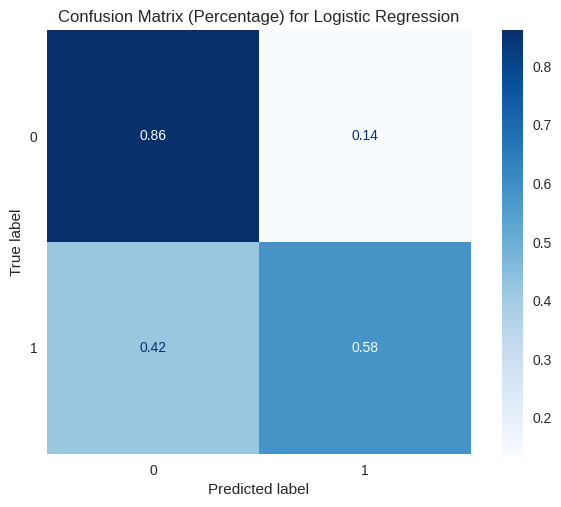

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Predict on the test set using logistic regression model
log_reg_pred = log_reg.predict(X_test)

# Confusion Matrix (normalized to show percentages)
cm = confusion_matrix(y_test, log_reg_pred, labels=log_reg.classes_, normalize='true')

# Display the confusion matrix with percentages
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Percentage) for Logistic Regression')
plt.grid(False)  # Remove grid lines for a cleaner look
plt.show()


**Confusion Matrix interpretation**
This image is a confusion matrix for a binary classification model (logistic regression), likely used for predicting a binary outcome like customer churn. Here's an interpretation of each cell in the matrix and overall model performance:

Top-left (0.86): True Negatives (TN) 86% of the instances that were truly "0" (not churn) were correctly predicted as "0" by the model.
Top-right (0.14): False Positives (FP) 14% of the instances that were truly "0" (not churn) were incorrectly predicted as "1" (churn).
Bottom-left (0.42): False Negatives (FN) 42% of the instances that were truly "1" (churn) were incorrectly predicted as "0" (not churn).
Bottom-right (0.58): True Positives (TP) 58% of the instances that were truly "1" (churn) were correctly predicted as "1".


In [ ]:
%timeit log_reg.predict(X_test)

3.74 ms ± 169 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
# Print Precision, Recall, and F1 Score
print('Precision:', precision_score(y_test, log_reg_pred))
print('=======================================')
print('Recall:', recall_score(y_test, log_reg_pred))
print('=======================================')
print('F1 Score:', f1_score(y_test, log_reg_pred))

Precision: 0.6027777777777777
Recall: 0.5802139037433155
F1 Score: 0.5912806539509536


Precision (0.60): Precision represents the proportion of correct positive predictions (i.e., correctly predicted churn cases) out of all cases that the model predicted as churn. A precision of 0.60 means that 60% of customers predicted to churn by the model actually did churn. This suggests that the model is reasonably good at identifying actual churners when it does make a positive prediction. However, some customers who are predicted to churn do not actually churn, resulting in some false positives.

Recall (0.58): Recall indicates the model's ability to correctly identify actual churners out of all true churners in the dataset. A recall of 0.58 means that 58% of customers who truly churned were correctly identified by the model. This shows that the model is somewhat effective in capturing true churn cases but still misses around 42% of actual churners (false negatives), indicating room for improvement in terms of coverage of true churn cases.

F1 Score (0.59): The F1 Score is the harmonic mean of Precision and Recall, providing a balance between them. A score of 0.59 suggests a moderate trade-off between Precision and Recall. It implies that the model has balanced performance: while it does not excel in either Precision or Recall individually, it performs reasonably well in identifying both actual churners and non-churners.

**Comparing the models**
Precision: The Logistic Regression model has a higher precision (0.60) compared to the Decision Tree model (0.46). This indicates that Logistic Regression is more accurate in identifying true positives when it predicts a customer will churn. In other words, when the Logistic Regression model predicts churn, it’s more likely to be correct, which is more valuable  and  precise  if we want to target interventions only on customers likely to churn.

Recall: Logistic Regression also has a higher recall (0.58) than the Decision Tree model (0.47). This means it is better at capturing actual churn cases, identifying a greater proportion of customers who truly churn. Higher recall is more preferable for ensuring more churn cases are detected.

F1 Score: The F1 Score makes a balance between Precision and Recall, making it a good indicator of the model's overall performance. Logistic Regression’s F1 Score (0.59) is significantly higher than that of the Decision Tree model (0.47), indicating that Logistic Regression achieves a better balance between identifying true churn cases and minimizing false alarms.

Even the decision tree gave us an accuracy score in test of 71.18% while the logistic regression gave us an accuracy score in test of 70.58%, the Logistic Regression model still outperforms the Decision Tree model across Precision, Recall, and F1 Score, it is the more effective choice for predicting customer churn in this case. It is better suited to both correctly identifying actual churners and limiting false positives, so at the end we will choose the Logistic Regression.

**Commenting on the runtime**
Logistic Regression has a faster training time (43.9 ms) compared to the Decision Tree (82.6 ms). The standard deviation for the Decision Tree is also relatively high (34.5 ms), suggesting variability in training time across runs. Logistic Regression shows more stable training times. So, Logistic Regression is generally faster and more stable in training than the Decision Tree.
The Decision Tree’s scoring time is more stable (679 µs deviation) compared to Logistic Regression (1.92 ms deviation).
However, the difference is very small, even the Decision Tree is faster at scoring than Logistic Regression, it doesn't matter too much.
So we will also opt for the logistic regression if we used the runtime to compare both models.
